C:\Users\Sanskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 11s - 14ms/step - accuracy: 0.9506 - loss: 0.1645 - val_accuracy: 0.9833 - val_loss: 0.0602
Epoch 2/5
844/844 - 9s - 10ms/step - accuracy: 0.9838 - loss: 0.0515 - val_accuracy: 0.9850 - val_loss: 0.0494
Epoch 3/5
844/844 - 9s - 10ms/step - accuracy: 0.9892 - loss: 0.0345 - val_accuracy: 0.9843 - val_loss: 0.0521
Epoch 4/5
844/844 - 9s - 10ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9863 - val_loss: 0.0509
Epoch 5/5
844/844 - 7s - 8ms/step - accuracy: 0.9943 - loss: 0.0177 - val_accuracy: 0.9880 - val_loss: 0.0479
TensorFlow Test Accuracy: 98.58%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


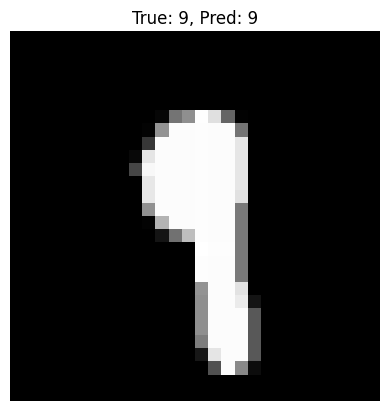

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


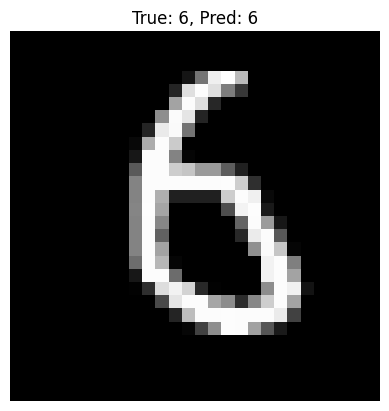

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


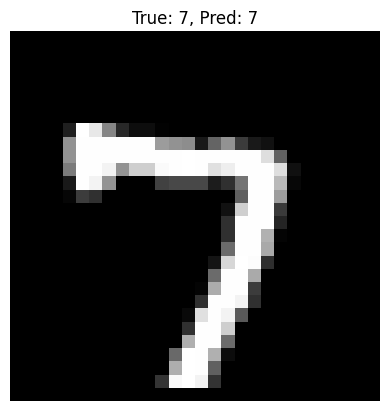

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


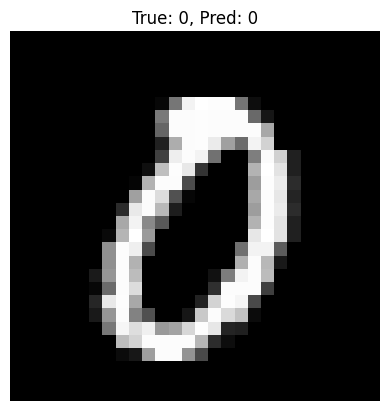

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


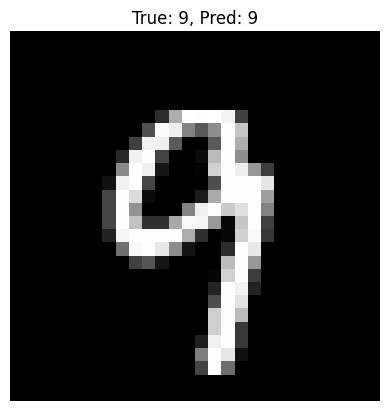

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., tf.newaxis] / 255.0
x_test  = x_test[...,  tf.newaxis] / 255.0

# Build model
tf_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

tf_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
tf_history = tf_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# Evaluate
loss, acc = tf_model.evaluate(x_test, y_test, verbose=0)
print(f"TensorFlow Test Accuracy: {acc*100:.2f}%")

# --- Testing on sample inputs ---
# Take 5 random test images and predict
test_samples = np.random.choice(len(x_test), 5, replace=False)
for idx in test_samples:
    img = x_test[idx]
    true_label = y_test[idx]
    pred = tf_model.predict(img[np.newaxis, ...])
    pred_label = np.argmax(pred)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()

Epoch 1/5
844/844 - 6s - 7ms/step - accuracy: 0.9519 - loss: 0.1605 - val_accuracy: 0.9833 - val_loss: 0.0593
Epoch 2/5
844/844 - 5s - 6ms/step - accuracy: 0.9846 - loss: 0.0500 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 3/5
844/844 - 5s - 6ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9873 - val_loss: 0.0458
Epoch 4/5
844/844 - 6s - 7ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9873 - val_loss: 0.0490
Epoch 5/5
844/844 - 6s - 7ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9877 - val_loss: 0.0485
Keras Test Accuracy: 98.73%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


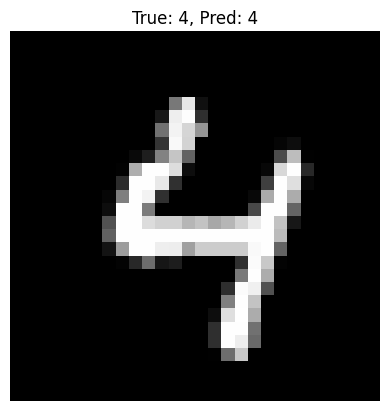

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


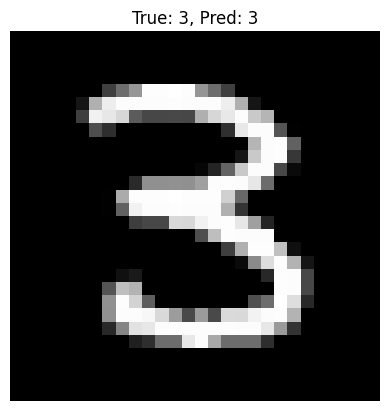

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


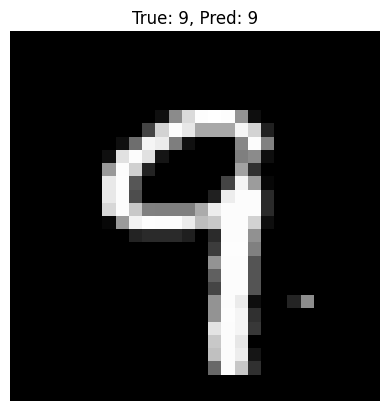

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


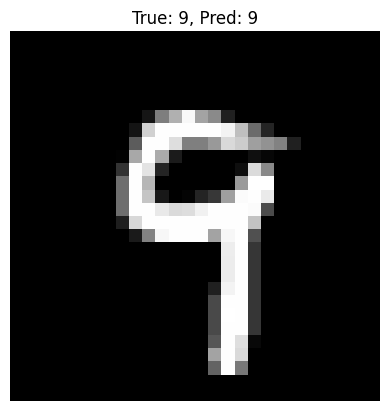

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


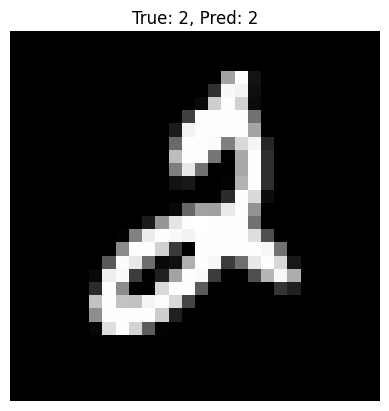

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test  = x_test.reshape(-1,28,28,1) / 255.0

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build model
keras_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

keras_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
keras_history = keras_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# Evaluate
loss, acc = keras_model.evaluate(x_test, y_test, verbose=0)
print(f"Keras Test Accuracy: {acc*100:.2f}%")

# --- Testing on sample inputs ---
# Convert one-hot back to label for display and prediction
y_test_labels = np.argmax(y_test, axis=1)
test_samples = np.random.choice(len(x_test), 5, replace=False)
for idx in test_samples:
    img = x_test[idx]
    true_label = y_test_labels[idx]
    pred = keras_model.predict(img[np.newaxis, ...])
    pred_label = np.argmax(pred)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:32<00:00, 307kB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 46.7kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:04<00:00, 410kB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
PyTorch Test Accuracy: 99.19%


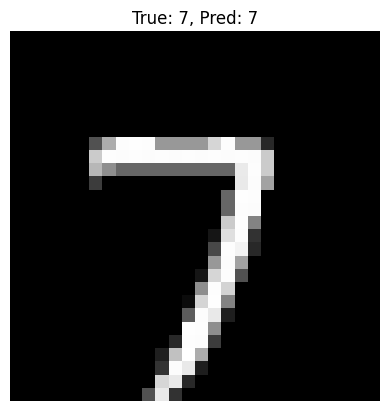

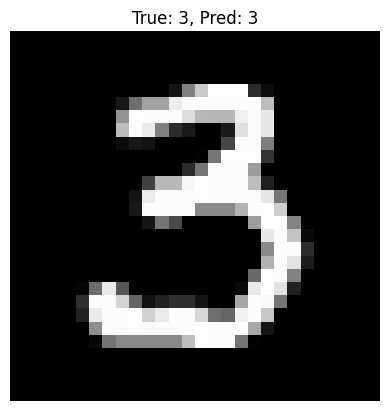

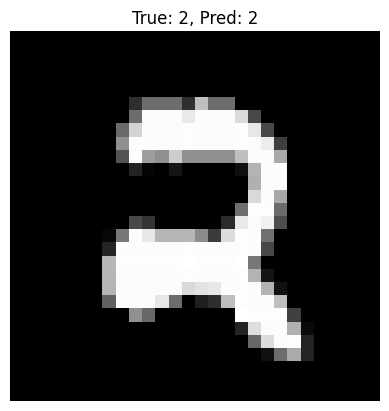

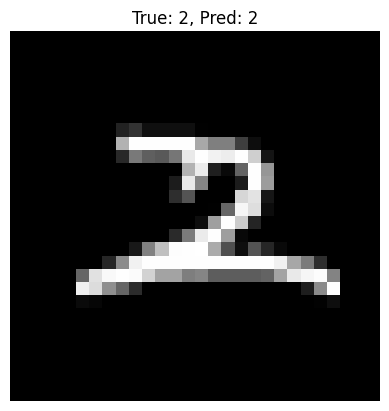

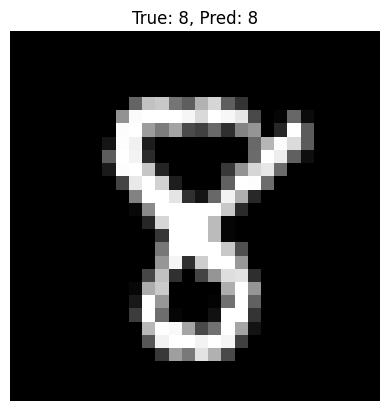

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_ds = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_ds  = datasets.MNIST('./data', train=False, transform=transform)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=1000, shuffle=False)

# Model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout = nn.Dropout(0.25)
        # adjust fc1 input to match output size after conv+pool: 64 channels of 12x12 feature maps
        self.fc1   = nn.Linear(64 * 12 * 12, 128)
        self.fc2   = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))       # -> 32 x 26 x 26
        x = F.relu(self.conv2(x))       # -> 64 x 24 x 24
        x = F.max_pool2d(x, 2)          # -> 64 x 12 x 12
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Training loop
for epoch in range(1,6):
    model.train()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch} complete")

# Test accuracy calculation
model.eval()
all_labels, all_preds = [], []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        preds = output.argmax(dim=1)
        all_labels.extend(target.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

acc = (np.array(all_preds) == np.array(all_labels)).mean()
print(f"PyTorch Test Accuracy: {acc*100:.2f}%")

# --- Testing on sample inputs ---
# Display 5 random test images with predictions
samples = np.random.choice(len(test_ds), 5, replace=False)
for idx in samples:
    img, label = test_ds[idx]
    with torch.no_grad():
        pred = model(img.unsqueeze(0).to(device)).argmax(dim=1).item()
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {label}, Pred: {pred}")
    plt.axis('off')
    plt.show()